# Logistic Regression

In this notebook, the Multiple Logistic Regression Model is used with 4 different target variables.
1. Covid Confirmed Cases
2. Covid Deaths
3. Covid Confirmed Cases Rate
4. Covid Death Rate

Table of Contents:


___
# Importing Modules and Loading Dataset

In [20]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy  import stats
%matplotlib inline

# Target Variable 'Covid Confirmed Cases'

In [21]:
data = pd.read_csv('tristate_final_data.csv')  # load data set
data.head()

,NAME,Covid Confirmed Cases,Covid Deaths,Population,Covid Case Rate (per 1000),Covid Death Rate (per 1000),Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
0,"Albany County, New York",87943,3989,304204,289.092188,13.112911,15087,34247,204833,15255,...,98,4744,7647,289287,38.5,36.8,40.0,126251,2,60631
1,"Allegany County, New York",2601,126,48946,53.140195,2.574266,2994,7305,30331,3219,...,9,206,557,48276,37.8,36.2,39.2,18208,2,10576
2,"Bronx County, New York",2544478,234021,1385108,1837.024983,168.955056,184934,512267,927374,264309,...,1288,351011,73243,643695,32.8,30.6,34.9,483449,3,368196
3,"Broome County, New York",24218,1802,200600,120.727817,8.983051,13226,30684,129802,12429,...,82,1912,5087,193822,40.2,38.1,42.2,82167,2,40559
4,"Cattaraugus County, New York",3875,128,80317,48.246324,1.593685,5801,13980,53201,6188,...,15,305,1363,78972,40.7,39.8,41.6,32263,2,18801


In [22]:
data.shape

(91, 39)

In [63]:
data1 = data.drop(columns=['Covid Deaths', 'Covid Case Rate (per 1000)', 'Covid Death Rate (per 1000)'])
data1.head()

,Covid Confirmed Cases,Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
NAME,,,,,,,,,,,,,,,,,,,,,
"Albany County, New York",87943.0,304204.0,15087.0,34247.0,204833.0,15255.0,50589.0,55932.0,43162.0,39895.0,...,98.0,4744.0,7647.0,289287.0,38.5,36.8,40.0,126251.0,2.0,60631.0
"Allegany County, New York",2601.0,48946.0,2994.0,7305.0,30331.0,3219.0,11464.0,9645.0,3012.0,2991.0,...,9.0,206.0,557.0,48276.0,37.8,36.2,39.2,18208.0,2.0,10576.0
"Bronx County, New York",2544478.0,1385108.0,184934.0,512267.0,927374.0,264309.0,256066.0,227450.0,115670.0,63879.0,...,1288.0,351011.0,73243.0,643695.0,32.8,30.6,34.9,483449.0,3.0,368196.0
"Broome County, New York",24218.0,200600.0,13226.0,30684.0,129802.0,12429.0,40700.0,40265.0,20371.0,16037.0,...,82.0,1912.0,5087.0,193822.0,40.2,38.1,42.2,82167.0,2.0,40559.0
"Cattaraugus County, New York",3875.0,80317.0,5801.0,13980.0,53201.0,6188.0,21015.0,15930.0,5702.0,4366.0,...,15.0,305.0,1363.0,78972.0,40.7,39.8,41.6,32263.0,2.0,18801.0


__Describe the Dataset__

In [58]:
desc_data = data1.describe()
desc_data

,Covid Confirmed Cases,Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
count,9.300000e+01,9.300000e+01,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.456057e+05,3.488362e+05,18293.857143,47275.835165,2.451077e+05,30821.109890,65796.329670,59239.230769,51549.593407,37701.483516,...,145.461538,24173.087912,10097.010989,2.889334e+05,40.156044,38.840659,41.445055,130804.417582,2.439560,79199.538462
std,7.649428e+05,5.080046e+05,37964.051161,100979.236017,3.673074e+05,63715.468434,91919.941862,79252.140070,84796.052782,64779.740953,...,286.893404,61846.053509,18676.792280,3.924738e+05,3.356676,3.499502,3.275851,189266.083833,0.540743,115049.547787
min,-1.772425e+06,-1.057765e+06,-86823.840626,-232323.008688,-7.719203e+05,-145599.033621,-188718.464512,-160200.008528,-183240.045099,-141665.497162,...,-648.910328,-147070.880057,-41616.685155,-7.977772e+05,29.800000,28.500000,31.100000,-393249.638553,0.942310,-239358.234560
25%,5.622000e+03,6.451900e+04,3320.000000,8027.000000,4.433000e+04,4825.000000,14790.000000,13218.000000,5702.000000,4366.000000,...,16.000000,512.000000,981.000000,6.177000e+04,38.500000,37.000000,39.900000,25290.000000,2.000000,13317.000000
50%,3.653600e+04,1.492650e+05,6896.000000,17693.000000,9.567900e+04,9121.000000,31537.000000,26080.000000,18515.000000,14169.000000,...,37.000000,2211.000000,3036.000000,1.266640e+05,40.400000,39.200000,41.900000,54244.000000,2.000000,30884.000000
75%,3.097170e+05,4.687300e+05,16861.000000,41743.000000,3.285060e+05,30352.000000,90581.000000,82970.000000,66537.000000,42865.000000,...,165.000000,18187.000000,12118.000000,3.876790e+05,41.700000,40.600000,43.000000,166785.000000,3.000000,109201.000000
max,3.587059e+06,2.504700e+06,231794.000000,623526.000000,1.789355e+06,345445.000000,461228.000000,376485.000000,397987.000000,366162.000000,...,1530.000000,351011.000000,100913.000000,2.008415e+06,51.300000,50.900000,51.800000,916856.000000,3.936811,594378.000000


In [59]:
# epxploring outliers in the dataset
# add the standard deviation metric 
data1.loc['+3_std'] = desc_data.loc['mean'] + (desc_data.loc['std']*3)
data1.loc['-3_std'] = desc_data.loc['mean'] - (desc_data.loc['std']*3)

desc_data

,Covid Confirmed Cases,Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
count,9.300000e+01,9.300000e+01,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.456057e+05,3.488362e+05,18293.857143,47275.835165,2.451077e+05,30821.109890,65796.329670,59239.230769,51549.593407,37701.483516,...,145.461538,24173.087912,10097.010989,2.889334e+05,40.156044,38.840659,41.445055,130804.417582,2.439560,79199.538462
std,7.649428e+05,5.080046e+05,37964.051161,100979.236017,3.673074e+05,63715.468434,91919.941862,79252.140070,84796.052782,64779.740953,...,286.893404,61846.053509,18676.792280,3.924738e+05,3.356676,3.499502,3.275851,189266.083833,0.540743,115049.547787
min,-1.772425e+06,-1.057765e+06,-86823.840626,-232323.008688,-7.719203e+05,-145599.033621,-188718.464512,-160200.008528,-183240.045099,-141665.497162,...,-648.910328,-147070.880057,-41616.685155,-7.977772e+05,29.800000,28.500000,31.100000,-393249.638553,0.942310,-239358.234560
25%,5.622000e+03,6.451900e+04,3320.000000,8027.000000,4.433000e+04,4825.000000,14790.000000,13218.000000,5702.000000,4366.000000,...,16.000000,512.000000,981.000000,6.177000e+04,38.500000,37.000000,39.900000,25290.000000,2.000000,13317.000000
50%,3.653600e+04,1.492650e+05,6896.000000,17693.000000,9.567900e+04,9121.000000,31537.000000,26080.000000,18515.000000,14169.000000,...,37.000000,2211.000000,3036.000000,1.266640e+05,40.400000,39.200000,41.900000,54244.000000,2.000000,30884.000000
75%,3.097170e+05,4.687300e+05,16861.000000,41743.000000,3.285060e+05,30352.000000,90581.000000,82970.000000,66537.000000,42865.000000,...,165.000000,18187.000000,12118.000000,3.876790e+05,41.700000,40.600000,43.000000,166785.000000,3.000000,109201.000000
max,3.587059e+06,2.504700e+06,231794.000000,623526.000000,1.789355e+06,345445.000000,461228.000000,376485.000000,397987.000000,366162.000000,...,1530.000000,351011.000000,100913.000000,2.008415e+06,51.300000,50.900000,51.800000,916856.000000,3.936811,594378.000000


In [25]:
# filter the outliers
#data_remove = data[(np.abs(stats.zscore(data))<3).all(axis=1)]

# show what rows were removed 
#data.index.difference(data_remove.index)
# Outcome: New York Counties with high amount of Covid Cases would be removed 

__Take Away__
Should we remove the outliers? 
- No, outliers are necessary in this dataset because it shows counties with the highest or lowest amount of COVID Confirmed Cases. In the above code block, when run, the New York counties with the highest amount of COVID cases were removed. We DO NOT want to do that; this project is focused on finding the counties with the most amount of Covid Confirmed Cases. 

In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, Albany County, New York to -3_std
Data columns (total 35 columns):
Covid Confirmed Cases                       95 non-null float64
Population                                  95 non-null float64
Households SNAP                             95 non-null float64
Estimated Individuals SNAP                  95 non-null float64
Total Citizen Educated in US                95 non-null float64
Citizen Less than High School  Education    95 non-null float64
Citizen High School  Graduate               95 non-null float64
Citizen Some College  Education             95 non-null float64
Citizen College Degree                      95 non-null float64
Citizen Graduate or Professional Degree     95 non-null float64
Total Citizen Income                        95 non-null float64
Citizen No Income                           95 non-null float64
Citizen Income $1-$9,999                    95 non-null float64
Citizen Income $10,000-$14,999              

In [61]:
data1.isnull().any()

Covid Confirmed Cases                       False
Population                                  False
Households SNAP                             False
Estimated Individuals SNAP                  False
Total Citizen Educated in US                False
Citizen Less than High School  Education    False
Citizen High School  Graduate               False
Citizen Some College  Education             False
Citizen College Degree                      False
Citizen Graduate or Professional Degree     False
Total Citizen Income                        False
Citizen No Income                           False
Citizen Income $1-$9,999                    False
Citizen Income $10,000-$14,999              False
Citizen Income $15,000-$24,999              False
Citizen Income $25,000-$34,999              False
Citizen Income $35,000-$49,999              False
Citizen Income $50,000-$64,999              False
Citizen Income $65,000-$74,999              False
Citizen Income $75,000 +                    False


In [28]:
#data1.hist()

In [64]:
# set the index equal to the NAME column (county, state) 
# drop the NAME column from the data df
#data1.index = data['NAME']
#data1 = data1.drop('NAME', axis=1)
#data1.head()

In [65]:
# set the data type to float for the data frame
data1 = data1.astype(float)
data1.dtypes

Covid Confirmed Cases                       float64
Population                                  float64
Households SNAP                             float64
Estimated Individuals SNAP                  float64
Total Citizen Educated in US                float64
Citizen Less than High School  Education    float64
Citizen High School  Graduate               float64
Citizen Some College  Education             float64
Citizen College Degree                      float64
Citizen Graduate or Professional Degree     float64
Total Citizen Income                        float64
Citizen No Income                           float64
Citizen Income $1-$9,999                    float64
Citizen Income $10,000-$14,999              float64
Citizen Income $15,000-$24,999              float64
Citizen Income $25,000-$34,999              float64
Citizen Income $35,000-$49,999              float64
Citizen Income $50,000-$64,999              float64
Citizen Income $65,000-$74,999              float64
Citizen Inco

___
# Data Exploration

,Covid Confirmed Cases,Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
Covid Confirmed Cases,1.000000,0.939945,0.824807,0.839012,0.937521,0.931299,0.930849,0.921499,0.886149,0.835805,...,0.916453,0.908096,0.942518,0.900000,-0.151396,-0.167396,-0.134063,0.911245,0.528366,0.943920
Population,0.939945,1.000000,0.883241,0.879921,0.997955,0.940400,0.980252,0.984640,0.964699,0.919353,...,0.927249,0.876092,0.958579,0.987286,-0.164414,-0.182925,-0.149657,0.992372,0.475680,0.989351
Households SNAP,0.824807,0.883241,1.000000,0.996045,0.880110,0.955703,0.869095,0.853093,0.810779,0.756252,...,0.922313,0.913779,0.908570,0.834604,-0.209990,-0.224703,-0.195080,0.888667,0.344237,0.884345
Estimated Individuals SNAP,0.839012,0.879921,0.996045,1.000000,0.874055,0.961490,0.878202,0.856088,0.791165,0.725316,...,0.925084,0.921144,0.907778,0.828016,-0.210691,-0.227555,-0.193126,0.875297,0.370239,0.890993
Total Citizen Educated in US,0.937521,0.997955,0.880110,0.874055,1.000000,0.941104,0.975534,0.979830,0.973971,0.930696,...,0.929175,0.875952,0.962095,0.986764,-0.159595,-0.175957,-0.146319,0.995602,0.465539,0.982494
Citizen Less than High School Education,0.931299,0.940400,0.955703,0.961490,0.941104,1.000000,0.936939,0.914184,0.874045,0.804701,...,0.978162,0.961590,0.978376,0.889527,-0.196483,-0.209368,-0.181522,0.929672,0.434403,0.935792
Citizen High School Graduate,0.930849,0.980252,0.869095,0.878202,0.975534,0.936939,1.000000,0.989097,0.908719,0.835428,...,0.915315,0.864888,0.941665,0.968614,-0.158470,-0.182700,-0.136912,0.958648,0.489731,0.985229
Citizen Some College Education,0.921499,0.984640,0.853093,0.856088,0.979830,0.914184,0.989097,1.000000,0.921929,0.867012,...,0.904717,0.846935,0.934829,0.980350,-0.146111,-0.172502,-0.124565,0.969341,0.468735,0.985593
Citizen College Degree,0.886149,0.964699,0.810779,0.791165,0.973971,0.874045,0.908719,0.921929,1.000000,0.980638,...,0.867889,0.806251,0.914735,0.965393,-0.123913,-0.131497,-0.120105,0.979224,0.452518,0.929795
Citizen Graduate or Professional Degree,0.835805,0.919353,0.756252,0.725316,0.930696,0.804701,0.835428,0.867012,0.980638,1.000000,...,0.808866,0.746316,0.859765,0.926787,-0.101709,-0.105210,-0.103081,0.946920,0.395821,0.873678


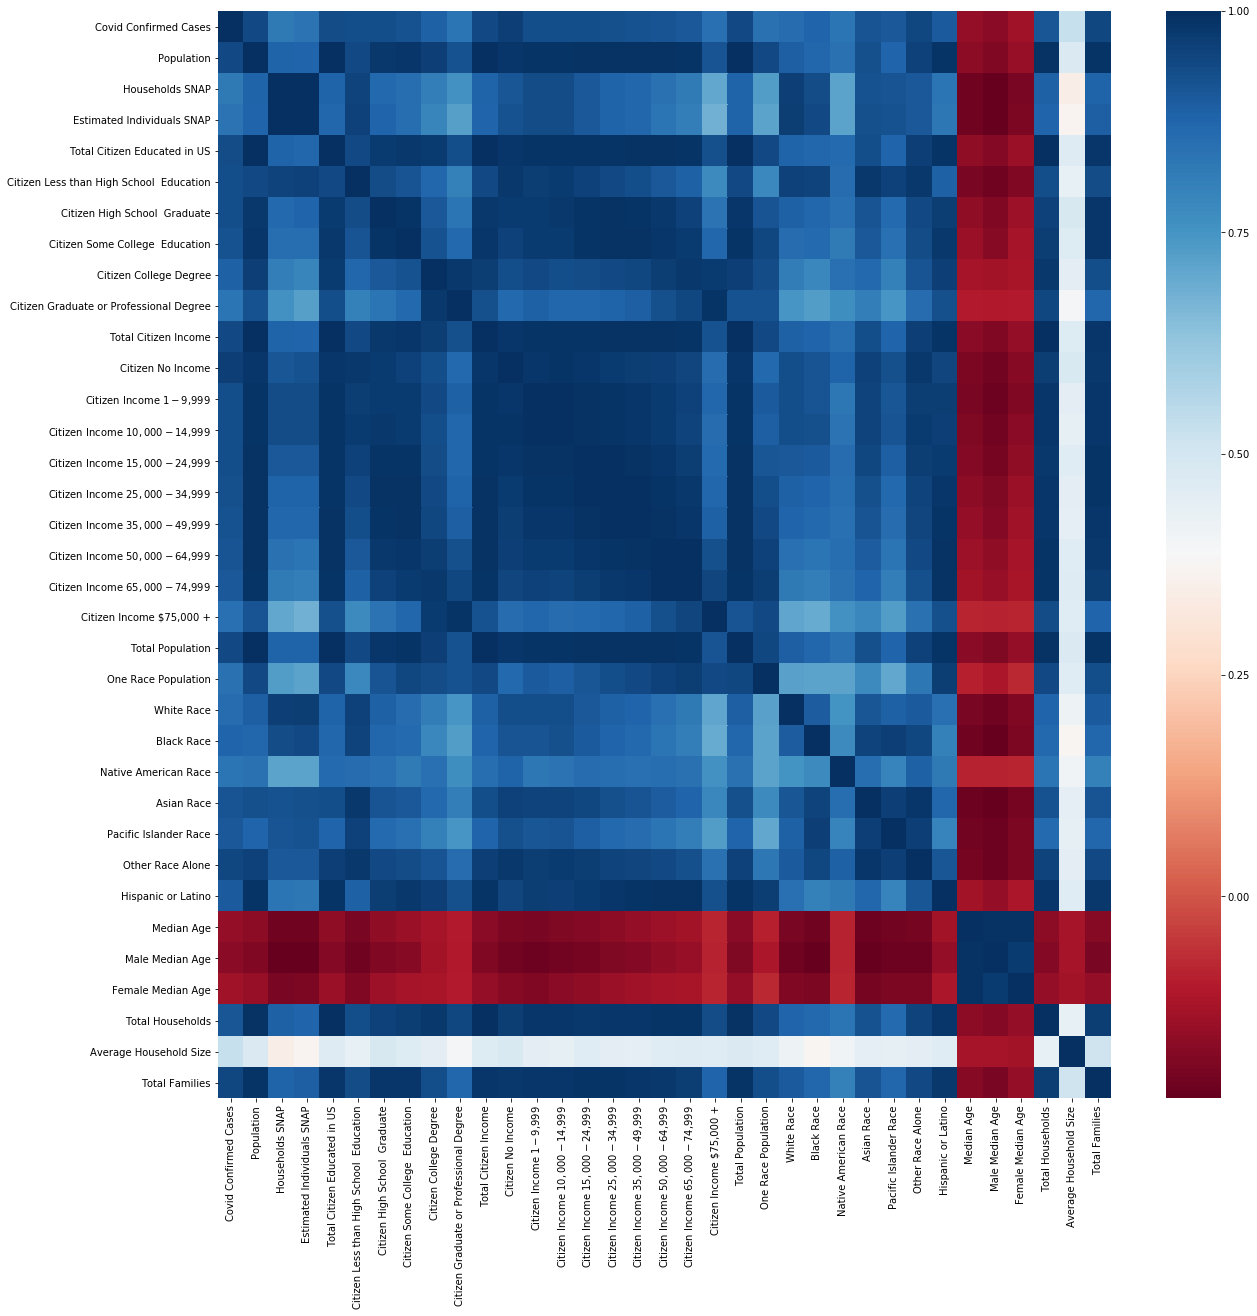

In [66]:
# print out a correlation matrix of the data frame
corr = data1.corr()

# display it
display(corr)
f, ax = plt.subplots(figsize=(20, 20)) # adjust the size of the heat map to see all the features 

# plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

__Take Away__
- The darker the spots the higher the correlation between the features. 
- We are looking at our __Target Variable: Covid Confirmed Cases__ and you see for
    - Income 'No Income' has the highest correlation
    - Race 'Other Race Alone', 'Asian Race', 'Hispanic or Lation', and 'Black Race' have a higher correlation than 'White Race'
    - Gender 'Male Median Age' has a higher correlation compared to 'Female Median Age'

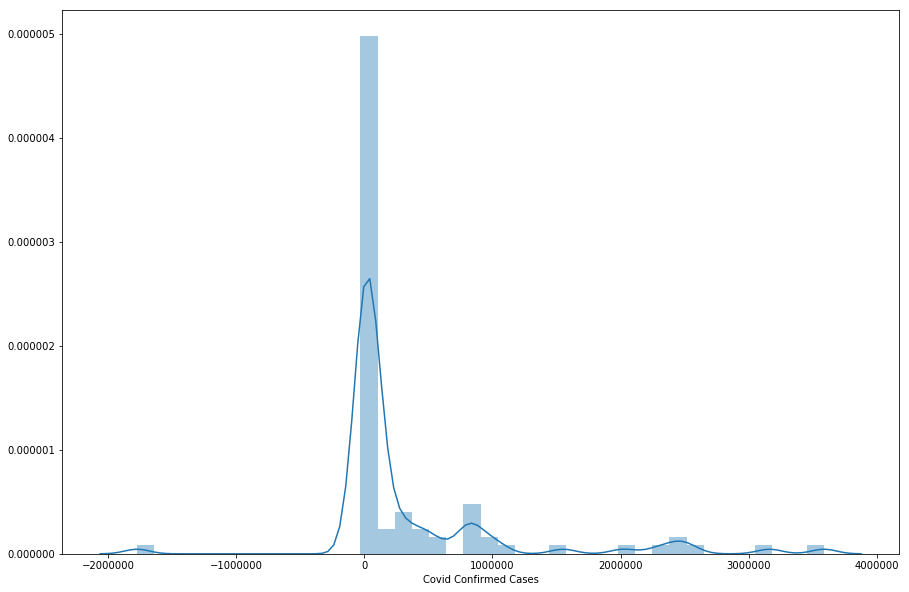

In [67]:
# check the average level of COVID Confirmed Cases
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data1['Covid Confirmed Cases'])

- Looking at the relationships between Covid Confirmed Cases and Race (White vs Black), Education (No high degree vs Masters or Professional), and Income Level (Second lowest income bracket vs Highest income bracket)

In [69]:
# trim the spaces of the cells from the csv file
#data.columns = data.columns.to_series().apply(lambda x: x.strip())

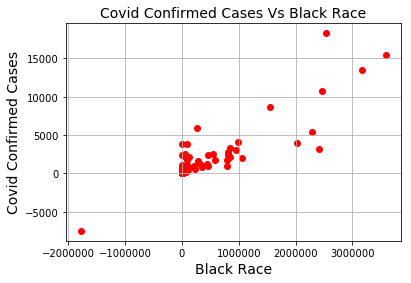

In [70]:
# scatter plot relationship between Covid Cases and Black Race
plt.scatter(data1['Covid Confirmed Cases'], data1['Black Race'], color='red')
plt.title('Covid Confirmed Cases Vs Black Race', fontsize=14)
plt.xlabel('Black Race', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

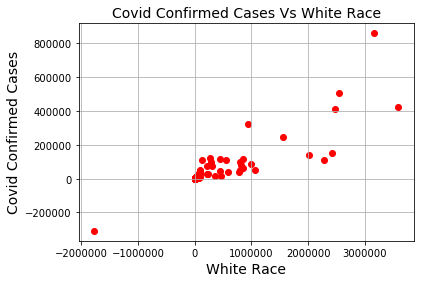

In [71]:
# scatter plot relationship between Covid Cases and and White Race
plt.scatter(data1['Covid Confirmed Cases'], data1['White Race'], color='red')
plt.title('Covid Confirmed Cases Vs White Race', fontsize=14)
plt.xlabel('White Race', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

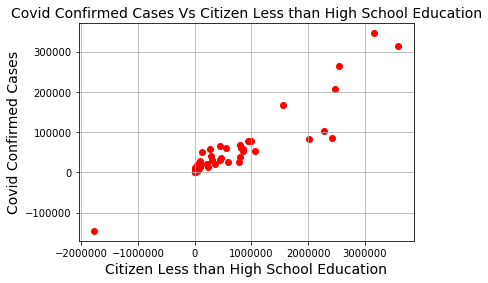

In [72]:
# scatter plot relationship between Covid Cases and Citizen Less than High School Education
plt.scatter(data1['Covid Confirmed Cases'], data1['Citizen Less than High School  Education'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Less than High School Education', fontsize=14)
plt.xlabel('Citizen Less than High School Education', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

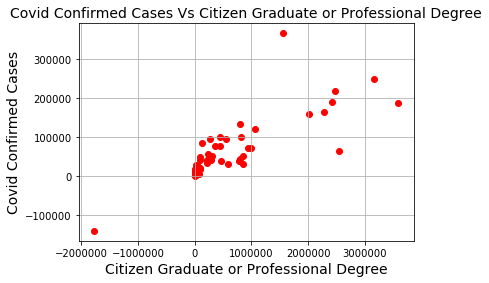

In [73]:
# scatter plot relationship between Covid Cases and Citizen Graduate or Professional Degree
plt.scatter(data1['Covid Confirmed Cases'], data1['Citizen Graduate or Professional Degree'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Graduate or Professional Degree', fontsize=14)
plt.xlabel('Citizen Graduate or Professional Degree', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

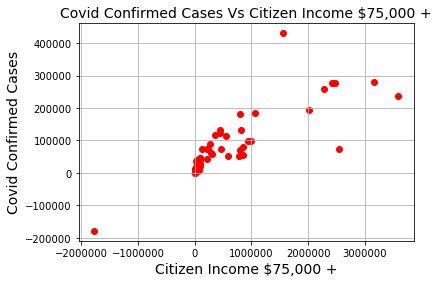

In [74]:
# scatter plot relationship between Covid Cases and Citizen Income $75,000 + (highest income bracket)
plt.scatter(data1['Covid Confirmed Cases'], data1['Citizen Income $75,000 +'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Income $75,000 +', fontsize=14)
plt.xlabel('Citizen Income $75,000 +', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

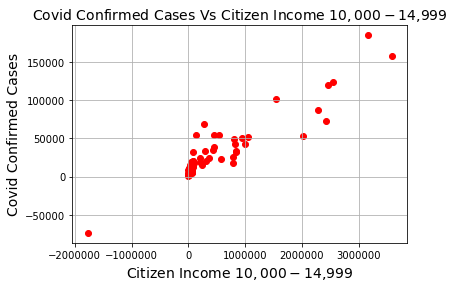

In [75]:
# scatter plot relationship between Covid Cases and Citizen Income $10,000-$14,999 (second lowest income bracket)
plt.scatter(data1['Covid Confirmed Cases'], data1['Citizen Income $10,000-$14,999'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Income $10,000-$14,999', fontsize=14)
plt.xlabel('Citizen Income $10,000-$14,999', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

__Take Away__
- Visually it is hard to tell with these scatter plots, however, there seems to be a more linear, in other words, stronger correlation between Black Race, Low Education, and Low Income and the number of Covid Confirmed Cases than features of the opposite race, education and income level.
___

# Build the Model

In [76]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels

X = data1[['Population','Households SNAP','Estimated Individuals SNAP','Total Citizen Educated in US','Citizen Less than High School  Education','Citizen High School  Graduate','Citizen Some College  Education','Citizen College Degree','Citizen Graduate or Professional Degree','Total Citizen Income','Citizen No Income','Citizen Income $1-$9,999','Citizen Income $10,000-$14,999','Citizen Income $15,000-$24,999','Citizen Income $25,000-$34,999','Citizen Income $35,000-$49,999','Citizen Income $50,000-$64,999','Citizen Income $65,000-$74,999','Citizen Income $75,000 +','One Race Population','White Race','Black Race','Native American Race','Asian Race','Pacific Islander Race','Other Race Alone','Hispanic or Latino','Total Households','Average Household Size','Total Families']]
y = data1['Covid Confirmed Cases']

In [77]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [78]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [79]:
# get the intercept and coef
intercept = regressor.intercept_

In [80]:
coef = regressor.coef_

In [81]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is -6.165e+04
----------------------------------------------------------------------------------------------------
The Coefficient for Population is 0.33
The Coefficient for Households SNAP is -1e+02
The Coefficient for Estimated Individuals SNAP is 3.5e+01
The Coefficient for Total Citizen Educated in US is 1.7e+01
The Coefficient for Citizen Less than High School  Education is -2.9
The Coefficient for Citizen High School  Graduate is -1.2e+01
The Coefficient for Citizen Some College  Education is -1.4e+01
The Coefficient for Citizen College Degree is -1.4e+01
The Coefficient for Citizen Graduate or Professional Degree is 1.1e+01
The Coefficient for Total Citizen Income is 8.2
The Coefficient for Citizen No Income is -7.3
The Coefficient for Citizen Income $1-$9,999 is -2.8e+01
The Coefficient for Citizen Income $10,000-$14,999 is 6.1e+01
The Coefficient for Citizen Income $15,000-$24,999 is -1.1e+01
The Coefficient for Citizen Income $25,000-$34,999 is -3.9

In [82]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Population,0.334298
Households SNAP,-102.991005
Estimated Individuals SNAP,34.692501
Total Citizen Educated in US,17.409532
Citizen Less than High School Education,-2.948770
Citizen High School Graduate,-12.044721
Citizen Some College Education,-14.073315
Citizen College Degree,-13.662630
Citizen Graduate or Professional Degree,10.968904
Total Citizen Income,8.165950


# Evaluating the Model

In [83]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([-3.68939554e+03,  9.97806977e+04,  6.67269457e+05, -1.50807679e+04,
        1.03320424e+05, -4.04841068e+03, -3.68245350e+04,  6.30692950e+05,
        3.69665068e+04,  1.05930805e+05,  7.67293639e+04, -6.53487744e+03,
        5.04031358e+06, -1.35656890e+04,  4.18926803e+04,  3.37017592e+05,
        9.49868211e+04, -5.44662584e+03, -1.21247830e+04])

In [84]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
NAME,,
"Salem County, New Jersey",23756.0,-3.689396e+03
"Gloucester County, New Jersey",98935.0,9.978070e+04
"Richmond County, New York",792054.0,6.672695e+05
"Chautauqua County, New York",3302.0,-1.508077e+04
"Greene County, New York",10814.0,1.033204e+05
"Clinton County, New York",5039.0,-4.048411e+03
"Allegany County, New York",2601.0,-3.682454e+04
"Rockland County, New York",786631.0,6.306930e+05
"Rensselaer County, New York",22753.0,3.696651e+04


In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 149055.47166656243
Mean Squared Error: 192041290647.0154
Root Mean Squared Error: 438225.1597603855


# Target Variable 'Covid Deaths'

In [86]:
data2 = pd.read_csv('tristate_final_data.csv')  # load data set
data2.head()

,NAME,Covid Confirmed Cases,Covid Deaths,Population,Covid Case Rate (per 1000),Covid Death Rate (per 1000),Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
0,"Albany County, New York",87943,3989,304204,289.092188,13.112911,15087,34247,204833,15255,...,98,4744,7647,289287,38.5,36.8,40.0,126251,2,60631
1,"Allegany County, New York",2601,126,48946,53.140195,2.574266,2994,7305,30331,3219,...,9,206,557,48276,37.8,36.2,39.2,18208,2,10576
2,"Bronx County, New York",2544478,234021,1385108,1837.024983,168.955056,184934,512267,927374,264309,...,1288,351011,73243,643695,32.8,30.6,34.9,483449,3,368196
3,"Broome County, New York",24218,1802,200600,120.727817,8.983051,13226,30684,129802,12429,...,82,1912,5087,193822,40.2,38.1,42.2,82167,2,40559
4,"Cattaraugus County, New York",3875,128,80317,48.246324,1.593685,5801,13980,53201,6188,...,15,305,1363,78972,40.7,39.8,41.6,32263,2,18801


In [89]:
data2 = data.drop(columns=['Covid Confirmed Cases', 'Covid Case Rate (per 1000)', 'Covid Death Rate (per 1000)'])
data2.head()

,Covid Deaths,Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
NAME,,,,,,,,,,,,,,,,,,,,,
"Albany County, New York",3989.0,304204.0,15087.0,34247.0,204833.0,15255.0,50589.0,55932.0,43162.0,39895.0,...,98.0,4744.0,7647.0,289287.0,38.5,36.8,40.0,126251.0,2.0,60631.0
"Allegany County, New York",126.0,48946.0,2994.0,7305.0,30331.0,3219.0,11464.0,9645.0,3012.0,2991.0,...,9.0,206.0,557.0,48276.0,37.8,36.2,39.2,18208.0,2.0,10576.0
"Bronx County, New York",234021.0,1385108.0,184934.0,512267.0,927374.0,264309.0,256066.0,227450.0,115670.0,63879.0,...,1288.0,351011.0,73243.0,643695.0,32.8,30.6,34.9,483449.0,3.0,368196.0
"Broome County, New York",1802.0,200600.0,13226.0,30684.0,129802.0,12429.0,40700.0,40265.0,20371.0,16037.0,...,82.0,1912.0,5087.0,193822.0,40.2,38.1,42.2,82167.0,2.0,40559.0
"Cattaraugus County, New York",128.0,80317.0,5801.0,13980.0,53201.0,6188.0,21015.0,15930.0,5702.0,4366.0,...,15.0,305.0,1363.0,78972.0,40.7,39.8,41.6,32263.0,2.0,18801.0


In [92]:
data2.shape

(93, 35)

__Describe the Dataset__

In [93]:
desc_data = data2.describe()
desc_data

,Covid Deaths,Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
count,93.000000,9.300000e+01,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,24234.989011,3.488362e+05,18293.857143,47275.835165,2.451077e+05,30821.109890,65796.329670,59239.230769,51549.593407,37701.483516,...,145.461538,24173.087912,10097.010989,2.889334e+05,40.156044,38.840659,41.445055,130804.417582,2.439560,79199.538462
std,64302.599659,5.080046e+05,37964.051161,100979.236017,3.673074e+05,63715.468434,91919.941862,79252.140070,84796.052782,64779.740953,...,286.893404,61846.053509,18676.792280,3.924738e+05,3.356676,3.499502,3.275851,189266.083833,0.540743,115049.547787
min,-153810.847246,-1.057765e+06,-86823.840626,-232323.008688,-7.719203e+05,-145599.033621,-188718.464512,-160200.008528,-183240.045099,-141665.497162,...,-648.910328,-147070.880057,-41616.685155,-7.977772e+05,29.800000,28.500000,31.100000,-393249.638553,0.942310,-239358.234560
25%,221.000000,6.451900e+04,3320.000000,8027.000000,4.433000e+04,4825.000000,14790.000000,13218.000000,5702.000000,4366.000000,...,16.000000,512.000000,981.000000,6.177000e+04,38.500000,37.000000,39.900000,25290.000000,2.000000,13317.000000
50%,1815.000000,1.492650e+05,6896.000000,17693.000000,9.567900e+04,9121.000000,31537.000000,26080.000000,18515.000000,14169.000000,...,37.000000,2211.000000,3036.000000,1.266640e+05,40.400000,39.200000,41.900000,54244.000000,2.000000,30884.000000
75%,19533.000000,4.687300e+05,16861.000000,41743.000000,3.285060e+05,30352.000000,90581.000000,82970.000000,66537.000000,42865.000000,...,165.000000,18187.000000,12118.000000,3.876790e+05,41.700000,40.600000,43.000000,166785.000000,3.000000,109201.000000
max,347696.000000,2.504700e+06,231794.000000,623526.000000,1.789355e+06,345445.000000,461228.000000,376485.000000,397987.000000,366162.000000,...,1530.000000,351011.000000,100913.000000,2.008415e+06,51.300000,50.900000,51.800000,916856.000000,3.936811,594378.000000


In [ ]:
data2.info()

In [ ]:
data2.isnull().any()

In [28]:
#data2.hist()

___
# Data Exploration

,Covid Deaths,Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
Covid Deaths,1.000000,0.930824,0.919649,0.929755,0.932932,0.987584,0.928184,0.899062,0.874996,0.800255,...,0.963049,0.944415,0.964880,0.882440,-0.157190,-0.168183,-0.143524,0.913807,0.452970,0.926314
Population,0.930824,1.000000,0.883241,0.879921,0.997955,0.940400,0.980252,0.984640,0.964699,0.919353,...,0.927249,0.876092,0.958579,0.987286,-0.164414,-0.182925,-0.149657,0.992372,0.475680,0.989351
Households SNAP,0.919649,0.883241,1.000000,0.996045,0.880110,0.955703,0.869095,0.853093,0.810779,0.756252,...,0.922313,0.913779,0.908570,0.834604,-0.209990,-0.224703,-0.195080,0.888667,0.344237,0.884345
Estimated Individuals SNAP,0.929755,0.879921,0.996045,1.000000,0.874055,0.961490,0.878202,0.856088,0.791165,0.725316,...,0.925084,0.921144,0.907778,0.828016,-0.210691,-0.227555,-0.193126,0.875297,0.370239,0.890993
Total Citizen Educated in US,0.932932,0.997955,0.880110,0.874055,1.000000,0.941104,0.975534,0.979830,0.973971,0.930696,...,0.929175,0.875952,0.962095,0.986764,-0.159595,-0.175957,-0.146319,0.995602,0.465539,0.982494
Citizen Less than High School Education,0.987584,0.940400,0.955703,0.961490,0.941104,1.000000,0.936939,0.914184,0.874045,0.804701,...,0.978162,0.961590,0.978376,0.889527,-0.196483,-0.209368,-0.181522,0.929672,0.434403,0.935792
Citizen High School Graduate,0.928184,0.980252,0.869095,0.878202,0.975534,0.936939,1.000000,0.989097,0.908719,0.835428,...,0.915315,0.864888,0.941665,0.968614,-0.158470,-0.182700,-0.136912,0.958648,0.489731,0.985229
Citizen Some College Education,0.899062,0.984640,0.853093,0.856088,0.979830,0.914184,0.989097,1.000000,0.921929,0.867012,...,0.904717,0.846935,0.934829,0.980350,-0.146111,-0.172502,-0.124565,0.969341,0.468735,0.985593
Citizen College Degree,0.874996,0.964699,0.810779,0.791165,0.973971,0.874045,0.908719,0.921929,1.000000,0.980638,...,0.867889,0.806251,0.914735,0.965393,-0.123913,-0.131497,-0.120105,0.979224,0.452518,0.929795
Citizen Graduate or Professional Degree,0.800255,0.919353,0.756252,0.725316,0.930696,0.804701,0.835428,0.867012,0.980638,1.000000,...,0.808866,0.746316,0.859765,0.926787,-0.101709,-0.105210,-0.103081,0.946920,0.395821,0.873678


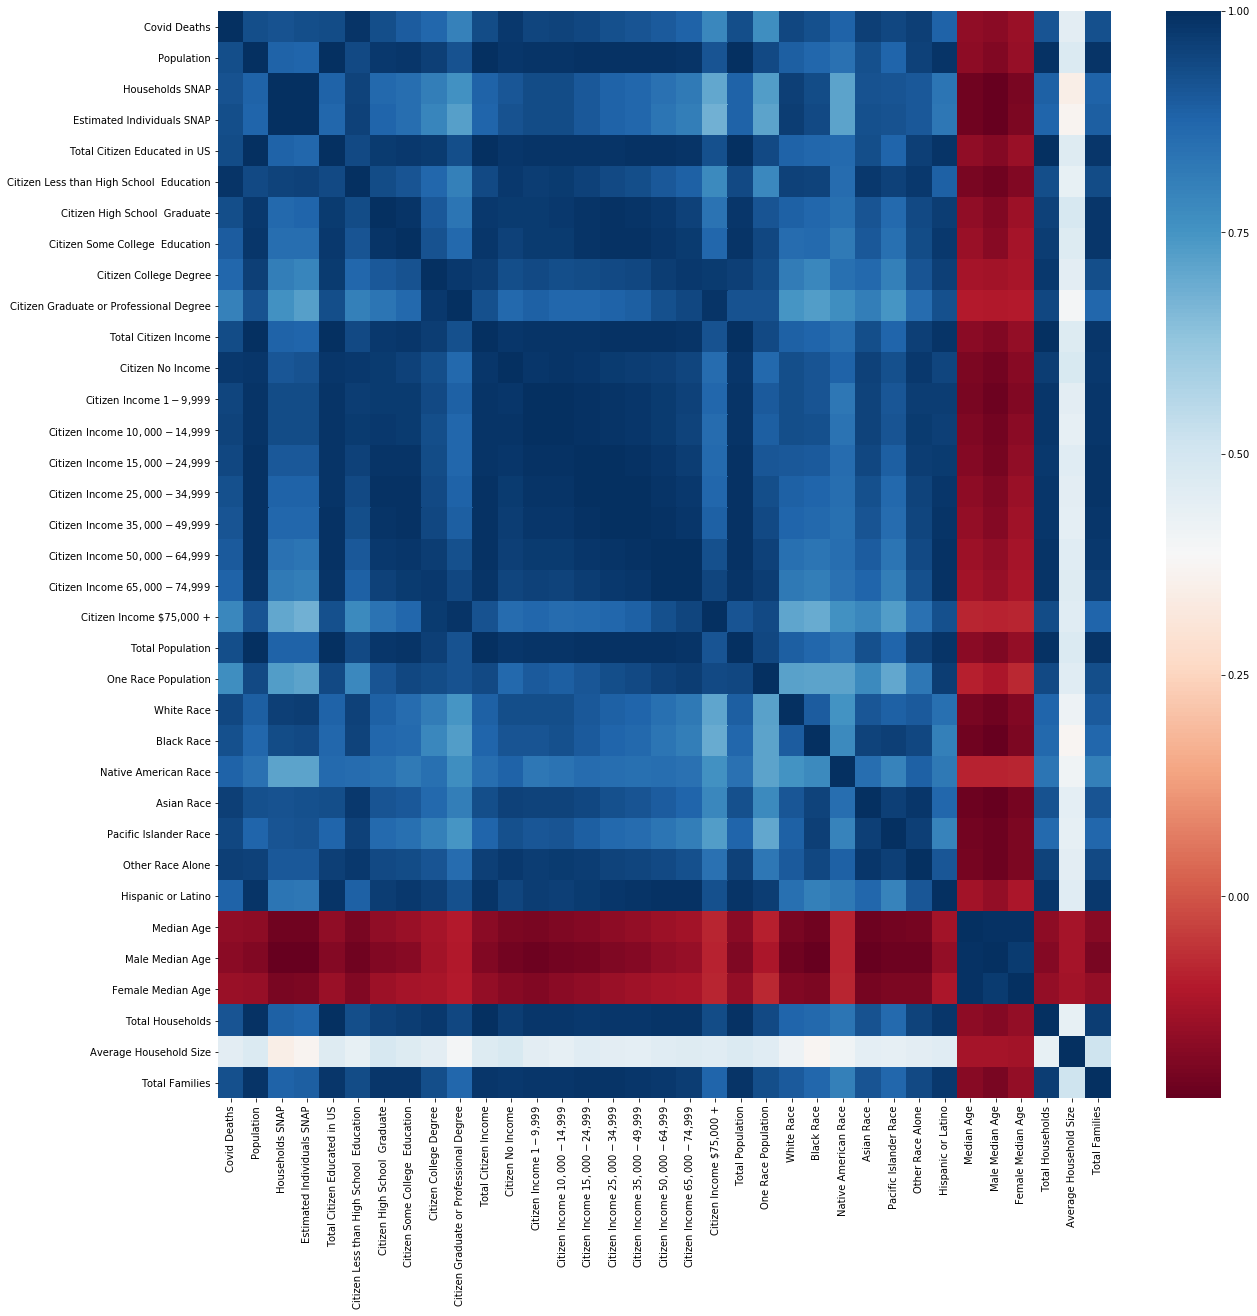

In [99]:
# print out a correlation matrix of the data frame
corr = data2.corr()

# display it
display(corr)
f, ax = plt.subplots(figsize=(20, 20)) # adjust the size of the heat map to see all the features 

# plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

__Take Away__
- The darker the spots the higher the correlation between the features. 
- We are looking at our __Target Variable: Covid Confirmed Cases__ and you see for
    - Income 'No Income' has the highest correlation
    - Race 'Other Race Alone', 'Asian Race', 'Hispanic or Lation', and 'Black Race' have a higher correlation than 'White Race'
    - Gender 'Male Median Age' has a higher correlation compared to 'Female Median Age'

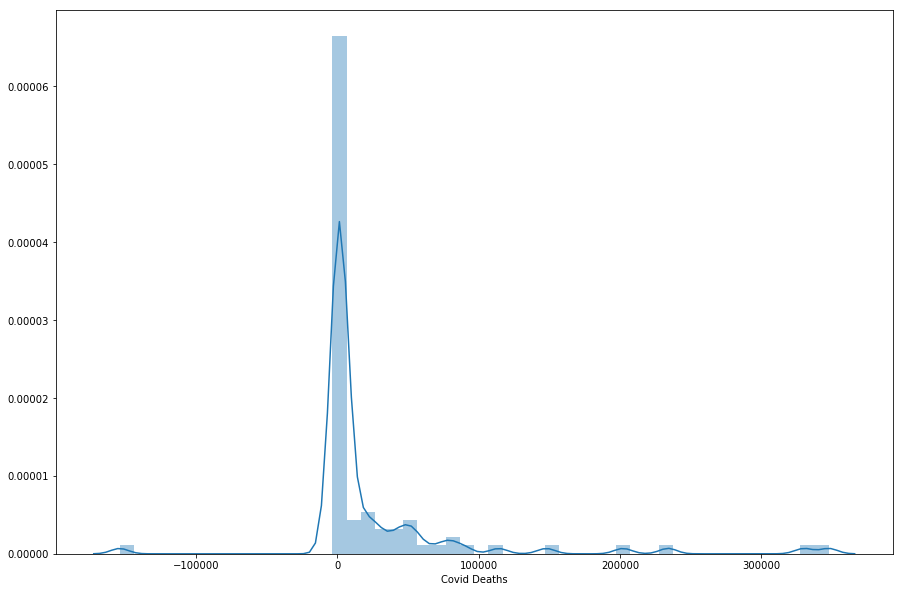

In [101]:
# check the average level of COVID Confirmed Cases
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data2['Covid Deaths'])

- Looking at the relationships between Covid Confirmed Cases and Race (White vs Black), Education (No high degree vs Masters or Professional), and Income Level (Second lowest income bracket vs Highest income bracket)

In [102]:
# trim the spaces of the cells from the csv file
data2.columns = data2.columns.to_series().apply(lambda x: x.strip())

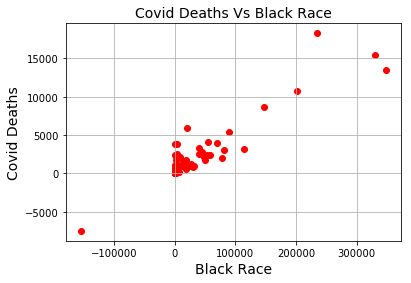

In [104]:
# scatter plot relationship between Covid Cases and Black Race
plt.scatter(data2['Covid Deaths'], data2['Black Race'], color='red')
plt.title('Covid Deaths Vs Black Race', fontsize=14)
plt.xlabel('Black Race', fontsize=14)
plt.ylabel('Covid Deaths', fontsize=14)
plt.grid(True)
plt.show()

# CHANGE ALL THESE -- covid deaths

In [ ]:
# scatter plot relationship between Covid Cases and and White Race
plt.scatter(data['Covid Confirmed Cases'], data['White Race'], color='red')
plt.title('Covid Confirmed Cases Vs White Race', fontsize=14)
plt.xlabel('White Race', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# scatter plot relationship between Covid Cases and Citizen Less than High School Education
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Less than High School  Education'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Less than High School Education', fontsize=14)
plt.xlabel('Citizen Less than High School Education', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# scatter plot relationship between Covid Cases and Citizen Graduate or Professional Degree
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Graduate or Professional Degree'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Graduate or Professional Degree', fontsize=14)
plt.xlabel('Citizen Graduate or Professional Degree', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# scatter plot relationship between Covid Cases and Citizen Income $75,000 + (highest income bracket)
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Income $75,000 +'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Income $75,000 +', fontsize=14)
plt.xlabel('Citizen Income $75,000 +', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# scatter plot relationship between Covid Cases and Citizen Income $10,000-$14,999 (second lowest income bracket)
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Income $10,000-$14,999'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Income $10,000-$14,999', fontsize=14)
plt.xlabel('Citizen Income $10,000-$14,999', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

__Take Away__
- Visually it is hard to tell with these scatter plots, however, there seems to be a more linear, in other words, stronger correlation between Black Race, Low Education, and Low Income and the number of Covid Confirmed Cases than features of the opposite race, education and income level.
___

CHANGE FOR COVID DEATHS 

# Build the Model

In [105]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels

X = data2[['Population','Households SNAP','Estimated Individuals SNAP','Total Citizen Educated in US','Citizen Less than High School  Education','Citizen High School  Graduate','Citizen Some College  Education','Citizen College Degree','Citizen Graduate or Professional Degree','Total Citizen Income','Citizen No Income','Citizen Income $1-$9,999','Citizen Income $10,000-$14,999','Citizen Income $15,000-$24,999','Citizen Income $25,000-$34,999','Citizen Income $35,000-$49,999','Citizen Income $50,000-$64,999','Citizen Income $65,000-$74,999','Citizen Income $75,000 +','One Race Population','White Race','Black Race','Native American Race','Asian Race','Pacific Islander Race','Other Race Alone','Hispanic or Latino','Total Households','Average Household Size','Total Families']]
y = data2['Covid Deaths']

In [106]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [107]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [108]:
# get the intercept and coef
intercept = regressor.intercept_

In [109]:
coef = regressor.coef_

In [110]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is 977.1
----------------------------------------------------------------------------------------------------
The Coefficient for Population is 0.033
The Coefficient for Households SNAP is -1.1e+01
The Coefficient for Estimated Individuals SNAP is 4.4
The Coefficient for Total Citizen Educated in US is -1.1
The Coefficient for Citizen Less than High School  Education is 1.7
The Coefficient for Citizen High School  Graduate is 0.74
The Coefficient for Citizen Some College  Education is 0.33
The Coefficient for Citizen College Degree is 0.8
The Coefficient for Citizen Graduate or Professional Degree is 0.95
The Coefficient for Total Citizen Income is 0.6
The Coefficient for Citizen No Income is 0.085
The Coefficient for Citizen Income $1-$9,999 is -1.0
The Coefficient for Citizen Income $10,000-$14,999 is 3.5
The Coefficient for Citizen Income $15,000-$24,999 is 1.1
The Coefficient for Citizen Income $25,000-$34,999 is -2.8
The Coefficient for Citizen Income $3

In [111]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Population,0.033495
Households SNAP,-10.776295
Estimated Individuals SNAP,4.385261
Total Citizen Educated in US,-1.054716
Citizen Less than High School Education,1.728938
Citizen High School Graduate,0.740972
Citizen Some College Education,0.327395
Citizen College Degree,0.799521
Citizen Graduate or Professional Degree,0.953096
Total Citizen Income,0.603144


# Evaluating the Model

In [112]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([ 1.68747720e+03,  1.44616489e+04,  4.10066420e+04, -5.03311586e+03,
        5.15904586e+03,  7.06195516e+02, -9.64822565e+02,  3.40783676e+04,
        1.74795412e+03,  2.77691205e+03,  1.42055910e+03,  2.11040589e+03,
        5.36626366e+05,  4.08714626e+01,  1.08721682e+03,  4.16232165e+03,
        1.81580740e+04,  4.12607125e+03, -2.48197885e+02])

In [113]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
NAME,,
"Salem County, New Jersey",1302.0,1687.477203
"Gloucester County, New Jersey",5268.0,14461.648899
"Richmond County, New York",50674.0,41006.642019
"Chautauqua County, New York",119.0,-5033.115861
"Greene County, New York",456.0,5159.045857
"Clinton County, New York",228.0,706.195516
"Allegany County, New York",126.0,-964.822565
"Rockland County, New York",26203.0,34078.367639
"Rensselaer County, New York",1131.0,1747.954117


In [114]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13594.823838433635
Mean Squared Error: 1914804893.2574928
Root Mean Squared Error: 43758.48367182635
